#### 0. EDA (*)
In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the load_dataset method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

##### a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

In [83]:
import seaborn as sns 

# Ladda mpg dataset
mpg_data = sns.load_dataset("mpg")

# Visa information om datasetet
print(mpg_data.info())

# Visa statistisk sammanfattning av datasetet
print(mpg_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

In [84]:
print(mpg_data.isnull().sum())

mpg_data_cleaned = mpg_data.dropna()
print(mpg_data_cleaned.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


####  b) Use describe only on those columns that are relevant to get statistical information from.

In [85]:
# Välj relevanta kolumner
relevanta_kolumner = mpg_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

# Visa statistisk sammanfattning av relevanta kolumner
print(relevanta_kolumner.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  
count    398.000000  
mean      15.568090  
std        2.757689  
min        8.000000  
25%       13.825000  
50%       15.500000  
75%       17.175000  
max       24.800000  


### Statistiska Mått

- **count**:  
  Antalet icke-null värden i kolumnen. Det visar hur många datapunkter som faktiskt finns för den specifika kolumnen.

- **mean**:  
  Medelvärdet av kolumnen. Det beräknas genom att summera alla värden och dela med antalet värden (count).

- **std**:  
  Standardavvikelsen. Det är ett mått på spridningen av värdena i kolumnen. En hög standardavvikelse indikerar att värdena är spridda över ett stort intervall, medan en låg standardavvikelse indikerar att värdena är nära medelvärdet.

- **min**:  
  Det minsta värdet i kolumnen. Det visar det lägsta datapunkten.

- **25% (1:a kvartilen)**:  
  Detta är värdet under vilket 25% av datapunkterna faller. Det är också känt som den första kvartilen (Q1).

- **50% (median)**:  
  Medianen av kolumnen. Det är det mittersta värdet när datapunkterna sorteras i ordning. Om det finns ett jämnt antal datapunkter, är medianen genomsnittet av de två mittersta värdena.

- **75% (3:e kvartilen)**:  
  Detta är värdet under vilket 75% av datapunkterna faller. Det är också känt som den tredje kvartilen (Q3).

- **max**:  
  Det största värdet i kolumnen. Det visar den högsta datapunkten.

#### c) Make some plots on some of the columns that you find interesting.

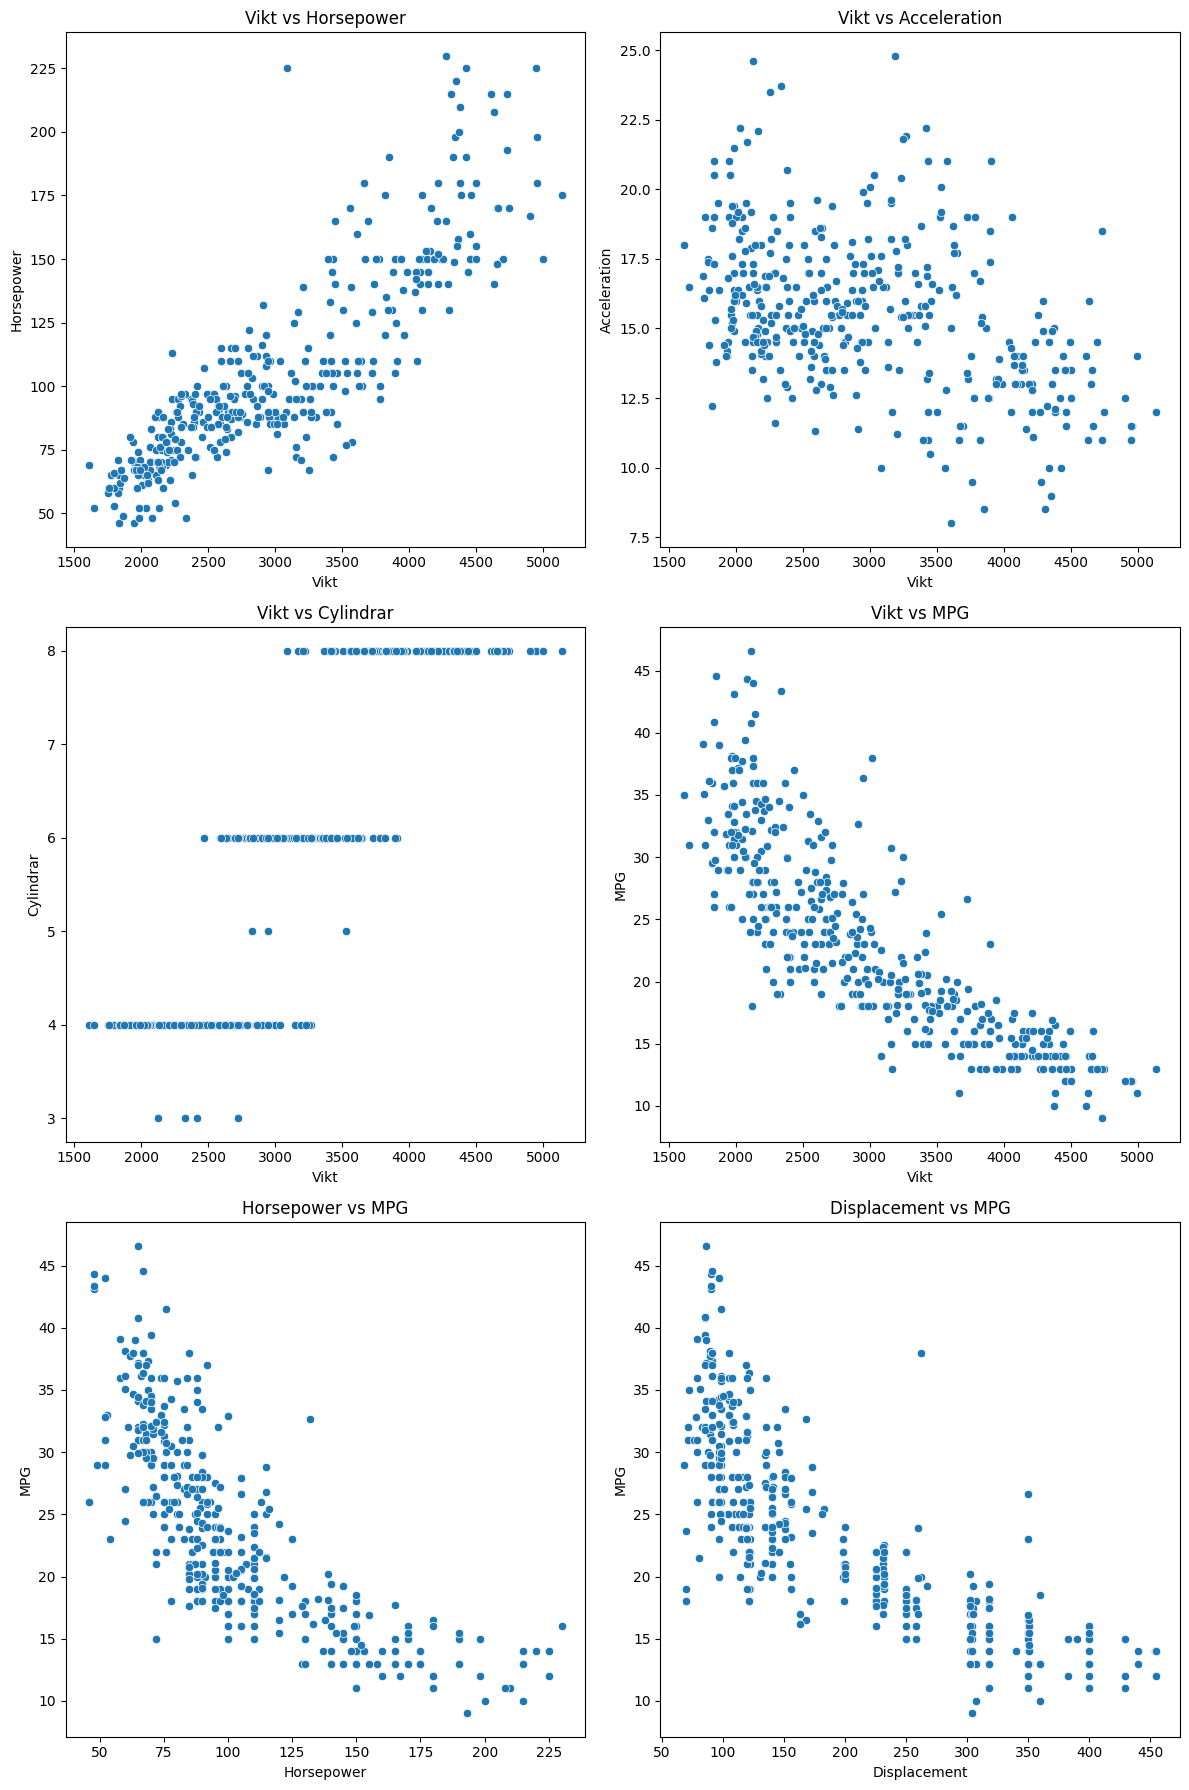

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Skapa en figur med 3 rader och 2 kolumner
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Plot 1: Vikt vs Hästar
sns.scatterplot(data=mpg_data, x='weight', y='horsepower', ax=axes[0, 0])
axes[0, 0].set_title('Vikt vs Horsepower')
axes[0, 0].set_xlabel('Vikt')
axes[0, 0].set_ylabel('Horsepower')

# Plot 2: Vikt vs Acceleration
sns.scatterplot(data=mpg_data, x='weight', y='acceleration', ax=axes[0, 1])
axes[0, 1].set_title('Vikt vs Acceleration')
axes[0, 1].set_xlabel('Vikt')
axes[0, 1].set_ylabel('Acceleration')

# Plot 3: Vikt vs Cylindrar
sns.scatterplot(data=mpg_data, x='weight', y='cylinders', ax=axes[1, 0])
axes[1, 0].set_title('Vikt vs Cylindrar')
axes[1, 0].set_xlabel('Vikt')
axes[1, 0].set_ylabel('Cylindrar')

# Plot 4: Vikt vs MPG
sns.scatterplot(data=mpg_data, x='weight', y='mpg', ax=axes[1, 1])
axes[1, 1].set_title('Vikt vs MPG')
axes[1, 1].set_xlabel('Vikt')
axes[1, 1].set_ylabel('MPG')

# Plot 5: Hästar vs MPG
sns.scatterplot(data=mpg_data, x='horsepower', y='mpg', ax=axes[2, 0])
axes[2, 0].set_title('Horsepower vs MPG')
axes[2, 0].set_xlabel('Horsepower')
axes[2, 0].set_ylabel('MPG')

# Plot 6: Displacement vs MPG
sns.scatterplot(data=mpg_data, x='displacement', y='mpg', ax=axes[2, 1])
axes[2, 1].set_title('Displacement vs MPG')
axes[2, 1].set_xlabel('Displacement')
axes[2, 1].set_ylabel('MPG')

# Justera layout
plt.tight_layout()
plt.show()

#### d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask.

In [87]:
# Visa alla kolumner i datasetet
print(mpg_data.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [88]:
# Ta bort kolumnerna "origin" och "name"
df_final = mpg_data_cleaned.drop(columns=['origin', 'name'])

# Visa de första raderna för att bekräfta att kolumnerna har tagits bort
df_final.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


#### 1. Train|test split (*)
We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.

Answer
Do a manual calculation to check against the shapes after train|test split.

In [89]:
from sklearn.model_selection import train_test_split

# Definiera funktioner och målvariabel
X = df_final.drop(columns=["mpg"])
y = df_final["mpg"]

# Dela datasetet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kontrollera storlekarna
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (313, 6)
Shape of X_test: (79, 6)
Shape of y_train: (313,)
Shape of y_test: (79,)


#### 2. Function for evaluation (*)
Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns LinearRegression() (OLS normal equation with SVD) and call your function to get metrics.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Beräkna MAE
mae = mean_absolute_error(y_test, predictions)

# Beräkna MSE
mse = mean_squared_error(y_test, predictions)

# Beräkna RMSE
rmse = np.sqrt(mse)

# Skriv ut resultaten
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 2.503860089776125
Mean Squared Error (MSE): 10.502370329417303
Root Mean Squared Error (RMSE): 3.2407360783342574
